In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from Dataset_Plot import *

In [85]:
df1 = pd.read_csv('nivel_procesado_1904-2023.csv')
df2 = pd.read_csv('Nivel_Caudal_Asu_Con_1960_2024.csv')

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43545 entries, 0 to 43544
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     43545 non-null  object 
 1   valor009  2640 non-null   float64
 2   valor010  19359 non-null  float64
 3   valor033  33439 non-null  float64
 4   valor088  18802 non-null  float64
 5   valor134  41430 non-null  float64
 6   valor183  33292 non-null  float64
 7   valor184  1177 non-null   float64
 8   valor191  196 non-null    float64
 9   valor210  2357 non-null   float64
 10  valor211  33249 non-null  float64
 11  e218      43512 non-null  float64
 12  valor219  1237 non-null   float64
 13  valor248  2459 non-null   float64
 14  valor252  1278 non-null   float64
 15  valor253  1286 non-null   float64
 16  valor254  12654 non-null  float64
 17  valor255  33287 non-null  float64
 18  valor257  2401 non-null   float64
 19  valor258  1105 non-null   float64
 20  valor261  10386 non-null  fl

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23457 entries, 0 to 23456
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fecha       23457 non-null  object 
 1   Con         23457 non-null  float64
 2   Asu         23457 non-null  float64
 3   Qcon        23442 non-null  float64
 4   Qasu_m      23424 non-null  float64
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 1.1+ MB


In [88]:
df1.isnull().sum()

fecha           0
valor009    40905
valor010    24186
valor033    10106
valor088    24743
valor134     2115
valor183    10253
valor184    42368
valor191    43349
valor210    41188
valor211    10296
e218           33
valor219    42308
valor248    41086
valor252    42267
valor253    42259
valor254    30891
valor255    10258
valor257    41144
valor258    42440
valor261    33159
valor263    42337
valor264    42189
valor288    41350
valor295    42443
valor297    41169
dtype: int64

In [89]:
df1_copy = df1.copy() # Realiza una copia del dataframe original
df1_copy['fecha'] = pd.to_datetime(df1_copy['fecha']) # Conversión de la columna fecha a datetime
df1_copy.set_index('fecha', inplace = True) # Coloca fecha como indice
datos_asu = df1_copy['e218'] # Toma los datos de niveles de asunción
datos_asu = datos_asu.interpolate(limit = 35, method = 'quadratic', limit_direction = 'both') # Interpolación de los datos faltantes de asunción 
dataset1 = pd.DataFrame(datos_asu) # Crea un dataset con los datos de asunción procesados
dataset1.columns = ['nivel'] # Nombra la columna del dataset como 'nivel'

In [95]:
def level_interpolate_plot(dataset, fecha_col, nivel_col, periodo_anios, cantidad_periodos, temporalidad, start_year, start_month=1, start_day=1):
    dataset[fecha_col] = pd.to_datetime(dataset[fecha_col], format=temporalidad) # Convierte la columna de la fecha a tipo datetime
    df = dataset.set_index(fecha_col) # Define un dataframe con la fecha indexada 
    df = df.interpolate(limit = 35, method = 'quadratic', limit_direction = 'both') # Interpola los datos de niveles 
    start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day) # Define la fecha de inicio (tipo de dato datetime)
    for _ in range(cantidad_periodos): # Bucle que se encarga en realizar la cantidad de ploteos elegido
        period_start = start_date # Define la fecha de inicio del ploteo del periodo actual
        period_end = start_date + pd.DateOffset(years=periodo_anios) - pd.DateOffset(days=1) # Calculo de la fecha final del ploteo del periodo actual
        df_period = df[period_start:period_end] # Filtro de los datos para el ploteo del periodo actual
        if df_period.empty: # Condición para la detección del ploteo
            break
        max_level = df_period[nivel_col].max() # Identifica el nivel máximo del periodo actual
        min_level = df_period[nivel_col].min() # Identifica el nivel mínimo del periodo actual
        max_date = df_period[nivel_col].idxmax() # Identifica el indice (la fecha) del nivel máximo del periodo actual
        min_date = df_period[nivel_col].idxmin() # Identifica el indice (la fecha) del nivel mínimo del periodo actual
        fig, ax = plt.subplots(figsize=(14, 7)) # Crea la figura en conjunto con los ejes
        ax.plot(df_period.index, df_period[nivel_col], label='Caudal de Concepción', color='blue') # Plot de los niveles del periodo actual
        ax.plot(max_date, max_level, 'ro', label=f'Pico más alto: {max_level:.2f}[m^3/s] ({max_date.date()})') # Plot del nivel máximo del periodo actual
        ax.plot(min_date, min_level, 'go', label=f'Pico más bajo: {min_level:.2f}[m^3/s] ({min_date.date()})') # Plot del nivel mínimo del periodo actual
        
        #-----CONFIGURACIONES EXTRAS PARA MEJORAR LA VISUALIZACIÓN EN EL PLOT------#
        #
        # Añade títulos y etiquetas
        ax.set_title(f'Periodo ({period_start.year}-{period_end.year})')
        ax.set_ylabel('Caudal [m^3/s]')
        ax.legend()
        #
        # Añade grid
        ax.grid(True)
        #
        # Añade grid para cada mes
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
        #
        # Formatea el eje de fechas
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        #
        #------------------------FIN DE LAS CONFIGURACIONES-------------------------#                
        
        plt.show() # Muestra la gráfica
        start_date = period_end + pd.DateOffset(days=1) # Actualiza la fecha de inicio para el siguiente periodo a plotear

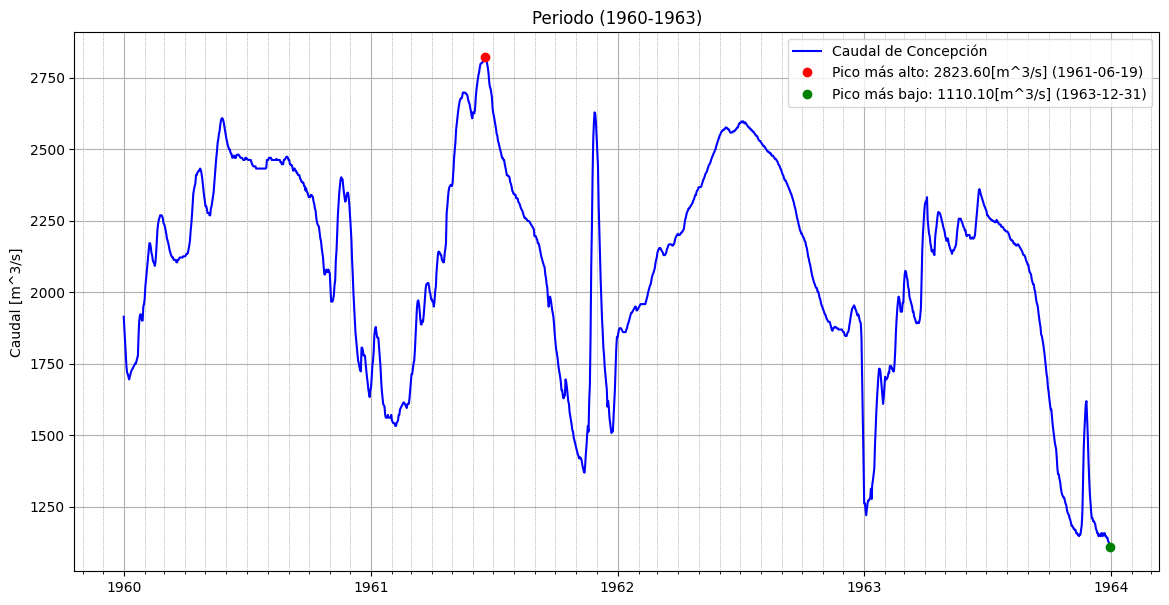

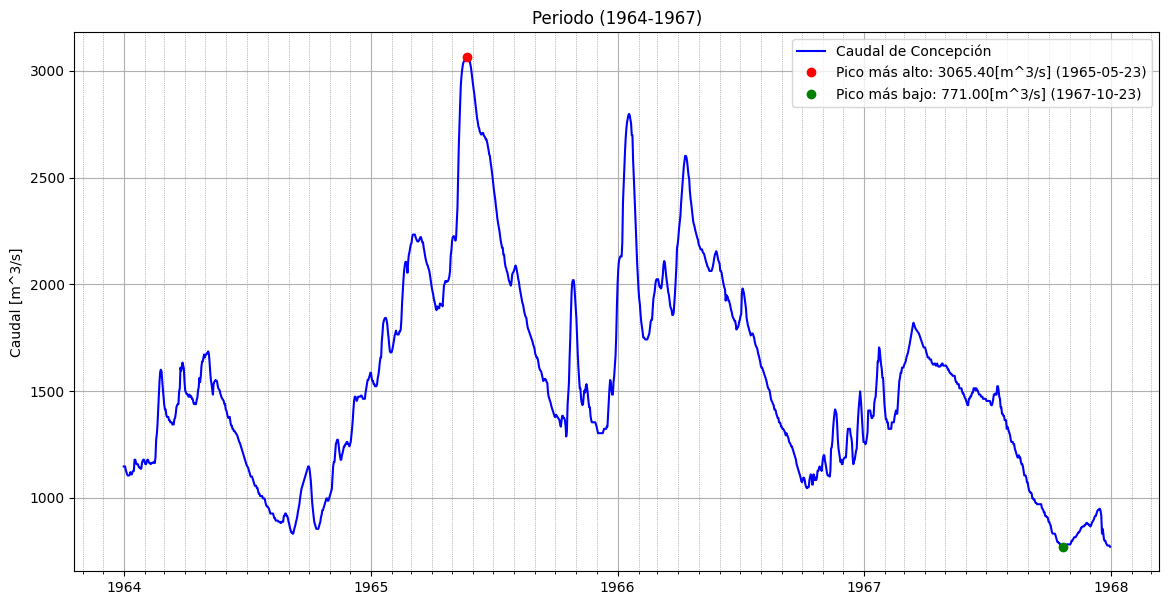

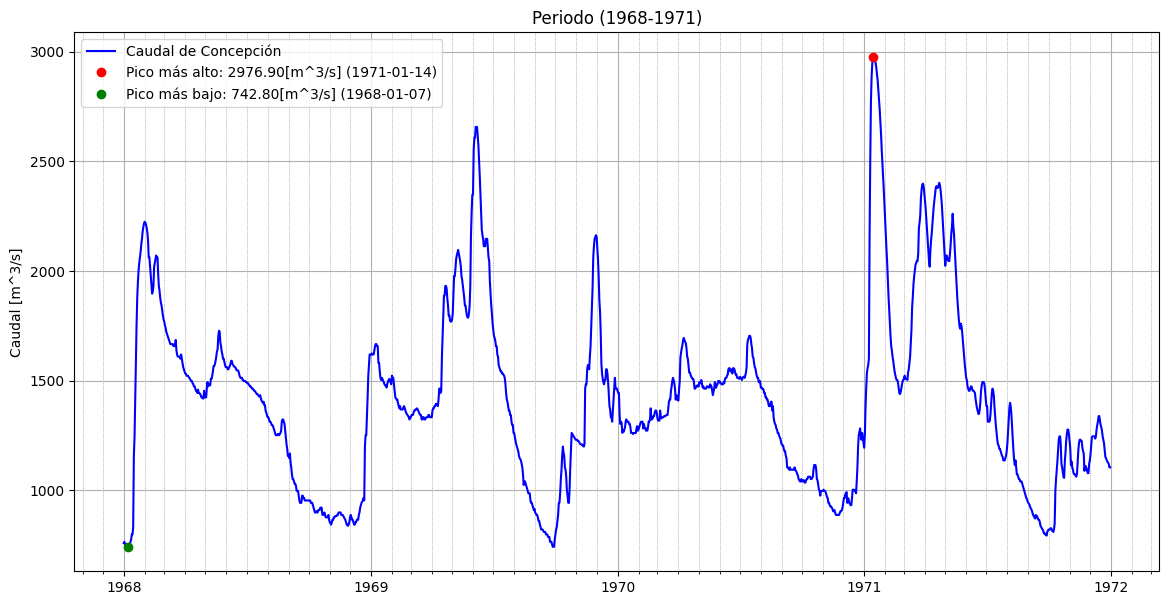

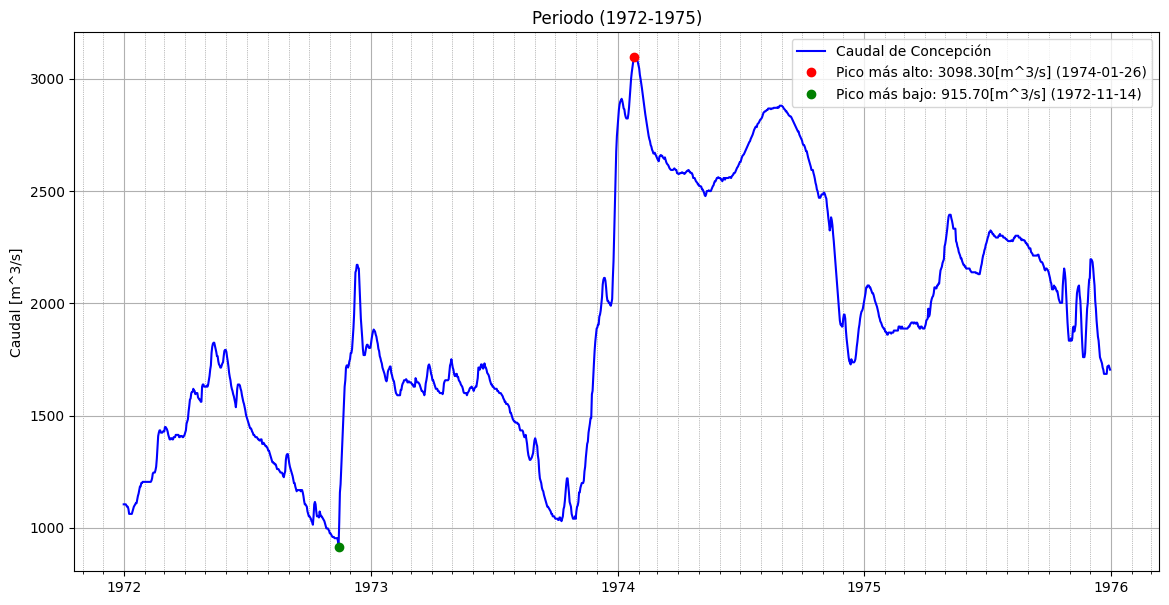

In [96]:
df2_copy = df2.copy() # Realiza una copia del dataframe original
#df2_copy['fecha'] = pd.to_datetime(df2_copy['fecha']) # Conversión de la columna fecha a datetime
#df2_copy.set_index('fecha', inplace = True) # Coloca fecha como indice
datos_asu = df2_copy[['fecha','Qcon']] # Toma los datos de niveles de asunción
#datos_asu = datos_asu.interpolate(limit = 35, method = 'quadratic', limit_direction = 'both') # Interpolación de los datos faltantes de asunción 
dataset2 = pd.DataFrame(datos_asu) # Crea un dataset con los datos de asunción procesados
#dataset2.columns= ['caudal_con'] # Nombra la columna del dataset como 'nivel'
level_interpolate_plot(dataset2, 'fecha', 'Qcon', 4, 4, '%m/%d/%Y', 1960, 1, 1)

In [41]:
dataset2

,fecha,Qcon
0,1/1/1960,1914.5
1,1/2/1960,1869.8
2,1/3/1960,1824.6
3,1/4/1960,1778.8
4,1/5/1960,1741.9
...,...,...
23452,3/17/2024,1272.1
23453,3/18/2024,1261.8
23454,3/19/2024,1256.7
23455,3/20/2024,1246.3


In [11]:
dataset1

,nivel
fecha,
1904-01-01,5.12
1904-01-02,5.16
1904-01-03,5.09
1904-01-04,4.96
1904-01-05,4.90
...,...
2023-03-17,4.97
2023-03-18,5.07
2023-03-19,5.15


In [12]:
dataset2

,caudal_con
fecha,
1960-01-01,1914.5
1960-01-02,1869.8
1960-01-03,1824.6
1960-01-04,1778.8
1960-01-05,1741.9
...,...
2024-03-17,1272.1
2024-03-18,1261.8
2024-03-19,1256.7


In [13]:
filtered_data1 = dataset1.loc['1960-01-01':]

In [14]:
filtered_data1

,nivel
fecha,
1960-01-01,5.20
1960-01-02,5.16
1960-01-03,5.09
1960-01-04,5.02
1960-01-05,4.92
...,...
2023-03-17,4.97
2023-03-18,5.07
2023-03-19,5.15


In [15]:
filtered_data2 = dataset2.loc[:'2023-03-21']

In [16]:
filtered_data2

,caudal_con
fecha,
1960-01-01,1914.5
1960-01-02,1869.8
1960-01-03,1824.6
1960-01-04,1778.8
1960-01-05,1741.9
...,...
2023-03-17,3182.3
2023-03-18,3159.2
2023-03-19,3133.0


In [17]:
df_new = dataset1.join(dataset2, how='inner')

In [18]:
df_new

,nivel,caudal_con
fecha,,
1960-01-01,5.20,1914.5
1960-01-02,5.16,1869.8
1960-01-03,5.09,1824.6
1960-01-04,5.02,1778.8
1960-01-05,4.92,1741.9
...,...,...
2023-03-17,4.97,3182.3
2023-03-18,5.07,3159.2
2023-03-19,5.15,3133.0


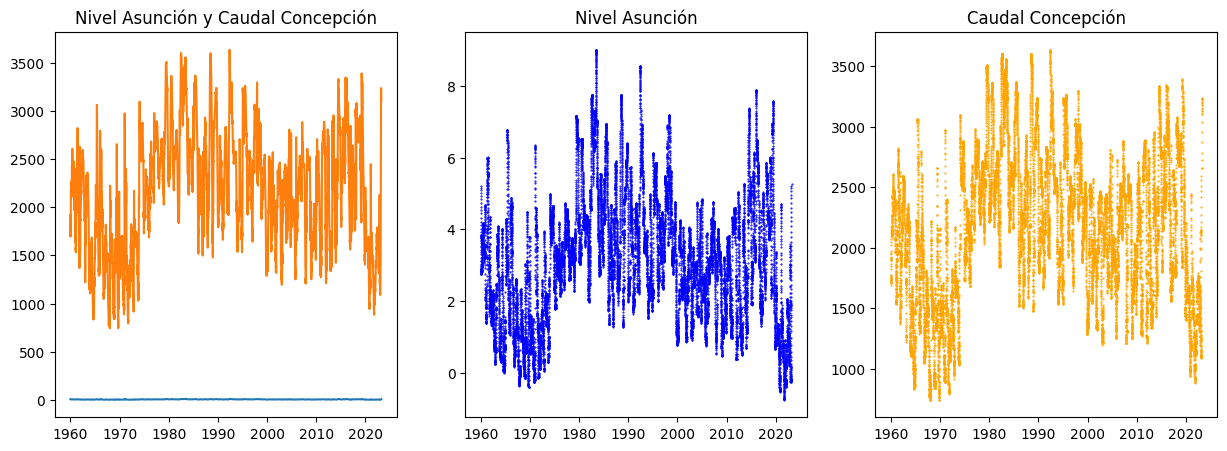

In [19]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.set_title("Nivel Asunción y Caudal Concepción")
ax1.plot(df_new)
ax2.set_title("Nivel Asunción")
ax2.plot(df_new['nivel'], linewidth=0, marker=".", color="blue", markersize=1)
ax3.set_title("Caudal Concepción")
ax3.plot(df_new['caudal_con'], linewidth=0, marker=".", color="orange", markersize=1)
plt.show()

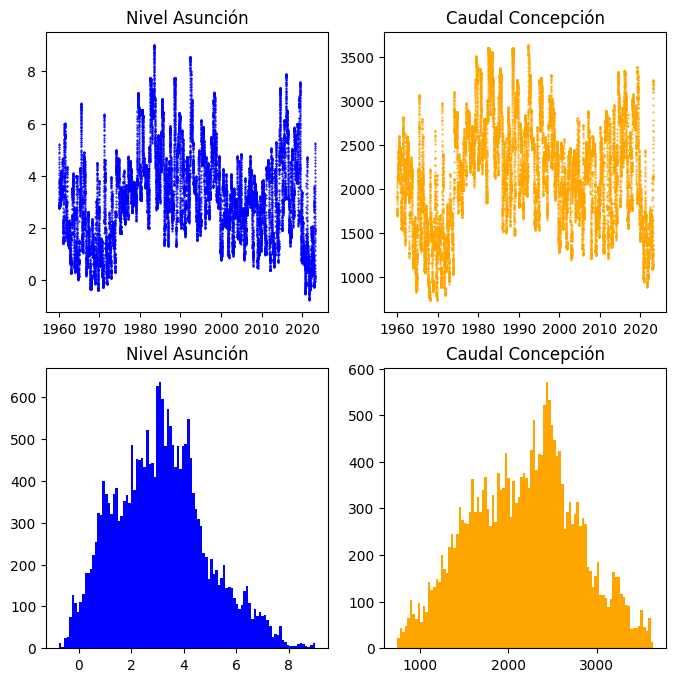

In [20]:
# Visualización adicional con histogramas
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.set_title("Nivel Asunción")
ax1.plot(df_new['nivel'], linewidth=0, marker=".", color="blue", markersize=1)
ax2.set_title("Caudal Concepción")
ax2.plot(df_new['caudal_con'], linewidth=0, marker=".", color="orange", markersize=1)
ax3.set_title("Nivel Asunción")
ax3.hist(df_new['nivel'], bins=100, color="blue")
ax4.set_title("Caudal Concepción")
ax4.hist(df_new['caudal_con'], bins=100, color="orange")
plt.show()

In [21]:
from sklearn import preprocessing 

In [22]:
# Normalización y estandarización de los datos
datos_min_max = preprocessing.MinMaxScaler().fit_transform(df_new)
datos_normalizer = preprocessing.Normalizer().transform(df_new.T).T
datos_standard_scaler = preprocessing.StandardScaler().fit_transform(df_new)
datos_robust_scaler = preprocessing.RobustScaler().fit_transform(df_new)

In [23]:
# Conversión a DataFrames
datos_min_max = pd.DataFrame(datos_min_max, columns=['nivel', 'caudal_con'])
datos_normalizer = pd.DataFrame(datos_normalizer, columns=['nivel', 'caudal_con'])
datos_standard_scaler = pd.DataFrame(datos_standard_scaler, columns=['nivel', 'caudal_con'])
datos_robust_scaler = pd.DataFrame(datos_robust_scaler, columns=['nivel', 'caudal_con'])

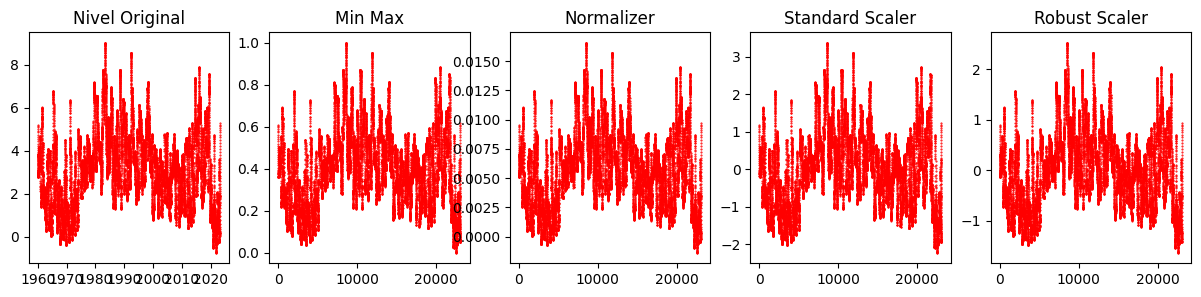

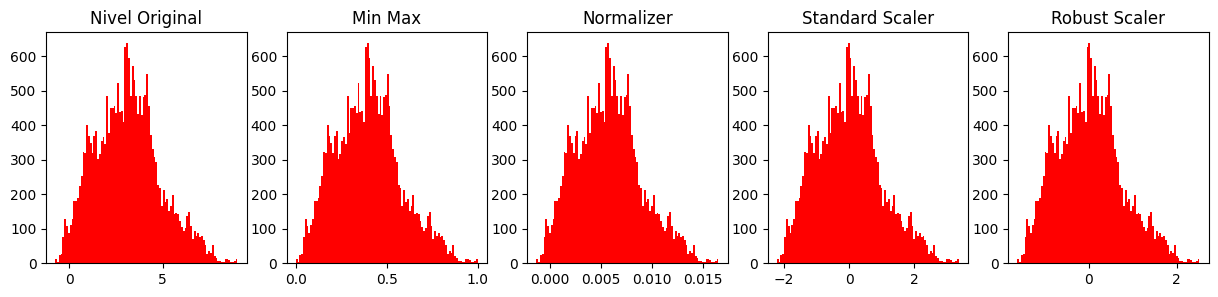

In [24]:
# Visualización comparativa de series temporales - Nivel
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

ax1.set_title("Nivel Original")
ax1.plot(df_new['nivel'], linewidth=0, marker=".", color="red", markersize=1)
ax2.set_title("Min Max")
ax2.plot(datos_min_max['nivel'], linewidth=0, marker=".", color="red", markersize=1)
ax3.set_title("Normalizer")
ax3.plot(datos_normalizer['nivel'], linewidth=0, marker=".", color="red", markersize=1)
ax4.set_title("Standard Scaler")
ax4.plot(datos_standard_scaler['nivel'], linewidth=0, marker=".", color="red", markersize=1)
ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler['nivel'], linewidth=0, marker=".", color="red", markersize=1)

plt.show()

# Visualización comparativa de histogramas - Nivel
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

ax1.set_title("Nivel Original")
ax1.hist(df_new['nivel'], color="red", bins=100)
ax2.set_title("Min Max")
ax2.hist(datos_min_max['nivel'], color="red", bins=100)
ax3.set_title("Normalizer")
ax3.hist(datos_normalizer['nivel'], color="red", bins=100)
ax4.set_title("Standard Scaler")
ax4.hist(datos_standard_scaler['nivel'], color="red", bins=100)
ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler['nivel'], color="red", bins=100)

plt.show()

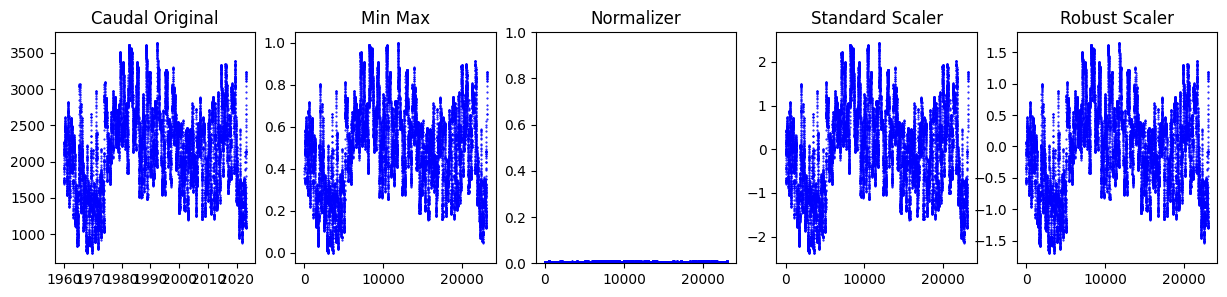

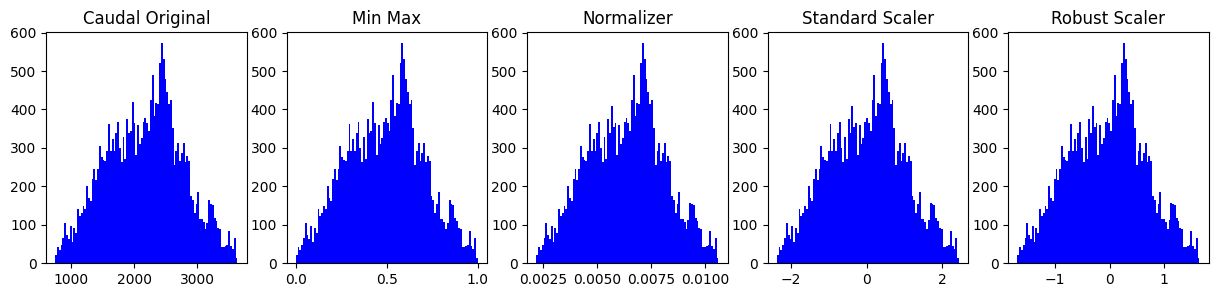

In [25]:
# Visualización comparativa de series temporales - Caudal 
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

ax1.set_title("Caudal Original")
ax1.plot(df_new['caudal_con'], linewidth=0, marker=".", color="blue", markersize=1)
ax2.set_title("Min Max")
ax2.plot(datos_min_max['caudal_con'], linewidth=0, marker=".", color="blue", markersize=1)
ax3.set_title("Normalizer")
ax3.plot(datos_normalizer['caudal_con'], linewidth=0, marker=".", color="blue", markersize=1)
ax3.set_ylim(0, 1)
ax4.set_title("Standard Scaler")
ax4.plot(datos_standard_scaler['caudal_con'], linewidth=0, marker=".", color="blue", markersize=1)
ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler['caudal_con'], linewidth=0, marker=".", color="blue", markersize=1)

plt.show()

# Visualización comparativa de histogramas - Caudal 
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

ax1.set_title("Caudal Original")
ax1.hist(df_new['caudal_con'], color="blue", bins=100)
ax2.set_title("Min Max")
ax2.hist(datos_min_max['caudal_con'], color="blue", bins=100)
ax3.set_title("Normalizer")
ax3.hist(datos_normalizer['caudal_con'], color="blue", bins=100)
ax4.set_title("Standard Scaler")
ax4.hist(datos_standard_scaler['caudal_con'], color="blue", bins=100)
ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler['caudal_con'], color="blue", bins=100)

plt.show()

In [26]:
datos_robust_scaler

,nivel,caudal_con
0,0.897872,-0.339607
1,0.880851,-0.391224
2,0.851064,-0.443418
3,0.821277,-0.496305
4,0.778723,-0.538915
...,...,...
23086,0.800000,1.124365
23087,0.842553,1.097691
23088,0.876596,1.067436
23089,0.902128,1.067436


In [27]:
df_new.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19',
               '2023-03-20', '2023-03-21'],
              dtype='datetime64[ns]', name='fecha', length=23091, freq=None)

In [28]:
df_new

,nivel,caudal_con
fecha,,
1960-01-01,5.20,1914.5
1960-01-02,5.16,1869.8
1960-01-03,5.09,1824.6
1960-01-04,5.02,1778.8
1960-01-05,4.92,1741.9
...,...,...
2023-03-17,4.97,3182.3
2023-03-18,5.07,3159.2
2023-03-19,5.15,3133.0


In [29]:
datos_norm = df_new.copy() # Copia del dataframe 
datos_norm['week_cos'] =  np.cos(2 * np.pi * datos_norm.index.isocalendar().week / 53)
datos_norm['week_sin'] =  np.sin(2 * np.pi * datos_norm.index.isocalendar().week / 53)
horizonte = 28 # Cantidad de días a predecir
tamanio_ventana = 365 # Datos de niveles de los últimos días para la predición
cantidad_unidades = 30 # Cantidad de neuronas
tamanio_batch = 30 # Tamaño del batch
dropout = 0.25 # Probabilidad para desactivar una neurona
features_set = 1 # Posición de características para el entrenamiento
year_ini = 73 # Año inicial
arch = 'GRU' # Arquictura del modelo
modelo = arch+'_h'+str(horizonte)+'_w'+str(tamanio_ventana)+'_u'+str(cantidad_unidades)+'_d'+str(dropout)+'_f'+str(features_set)+'_y'+str(year_ini)

In [33]:
datos_norm

,nivel,caudal_con,week_cos,week_sin
fecha,,,,
1960-01-01,5.20,1914.5,1.0,-0.0
1960-01-02,5.16,1869.8,1.0,-0.0
1960-01-03,5.09,1824.6,1.0,-0.0
1960-01-04,5.02,1778.8,0.992981,0.118273
1960-01-05,4.92,1741.9,0.992981,0.118273
...,...,...,...,...
2023-03-17,4.97,3182.3,0.263587,0.964636
2023-03-18,5.07,3159.2,0.263587,0.964636
2023-03-19,5.15,3133.0,0.263587,0.964636


In [30]:
def preparar_datos(tamanio_ventana,horizonte, data): # Función para la división datos para el entrenamiento
    n_features=len(data.columns)
    x_train = np.zeros((len(data)-tamanio_ventana-horizonte+1,tamanio_ventana, n_features))
    y_train= np.zeros((len(data)-tamanio_ventana-horizonte+1, horizonte ))
    for i in range(tamanio_ventana, len(data)-horizonte +1):
        x_train[(i-tamanio_ventana), :, :] = data.iloc[(i-tamanio_ventana):(i), :]
        y_train[i-tamanio_ventana, :] = data['nivel'].iloc[(i):(i+horizonte)]
    return x_train,y_train

In [31]:
import tensorflow as tf
import datetime as dt
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True )
tf.config.experimental.enable_op_determinism()

2024-06-05 22:31:53.418867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 22:31:57.330416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [35]:

lista = [['nivel'],['nivel','caudal_con','week_cos','week_sin']] # Lista con 2 columnas
seed = 42 # Valor elegida para la semilla
tf.random.set_seed(seed) # Establece la semilla para los generadores de números aletorios de TensorFlow
np.random.seed(seed) # Establece la semilla para los generadores de números aleatorios de NumPy
datos_normm = datos_norm[lista[features_set]].copy()
nfeatures = len(datos_normm.columns) # Cantidad de features

In [36]:
datos_normm

,nivel,caudal_con,week_cos,week_sin
fecha,,,,
1960-01-01,5.20,1914.5,1.0,-0.0
1960-01-02,5.16,1869.8,1.0,-0.0
1960-01-03,5.09,1824.6,1.0,-0.0
1960-01-04,5.02,1778.8,0.992981,0.118273
1960-01-05,4.92,1741.9,0.992981,0.118273
...,...,...,...,...
2023-03-17,4.97,3182.3,0.263587,0.964636
2023-03-18,5.07,3159.2,0.263587,0.964636
2023-03-19,5.15,3133.0,0.263587,0.964636


In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
desde = (dt.datetime.strptime('19'+str(year_ini)+'-01-01', '%Y-%m-%d')- dt.timedelta(days=tamanio_ventana)).strftime('%Y/%m/%d') # Toma la fecha que se encuentra en el año 'year_ini' hasta 'tamanio_ventana' días antes 
train = datos_normm.loc[desde:'2004-01-01'] # Selección para el conjunto de datos para el entrenamiento
ix = train.index # Toma los indices del conjunto de datos de entrenamiento
trainScaler = RobustScaler()# Inicializa una normalización de 0 a 1 para el conjunto de datos de entrenamiento
trainScaler.fit(train) # Ajusta la normalización a los datos de entrenamiento
trainScaled = pd.DataFrame(trainScaler.transform(train),columns=train.columns) # Crea un dataframe con el conjunto de datos de entrenamiento normalizados y ajustados
trainScaled.set_index(ix, inplace = True) # Agrega como indice la fecha al dataframe con los conjuntos de datos normalizados y ajustados
x_train, y_train = preparar_datos(tamanio_ventana,horizonte, trainScaled) # Divide los datos de entrenamiento

In [39]:
desde = (dt.datetime.strptime('2005-01-01', '%Y-%m-%d')- dt.timedelta(days=tamanio_ventana)).strftime('%Y/%m/%d') # Toma la fecha que se encuentra en el año '2014-01-01' hasta 'tamanio_ventana' días antes
val = datos_normm.loc[desde:'2012-01-01'] # Toma el conjunto de datos para la validación 
ix = val.index # Toma los indices del conjunto de datos de validación
valScaler = RobustScaler()# Inicializa una normalización de 0 a 1 para el conjunto de datos de validación
valScaler.fit(val) # Ajusta la normalización a los datos de validación
valScaled = pd.DataFrame(valScaler.transform(val),columns=val.columns) # Crea un dataframe con el conjunto de datos de validación normalizados y ajustados
valScaled.set_index(ix) # Agrega como indice la fecha al dataframe con los conjuntos de datos normalizados y ajustados
x_val, y_val = preparar_datos(tamanio_ventana,horizonte, valScaled) # Divide los datos de validación


In [40]:
from statsmodels.tsa.stattools import adfuller #Importa la función 'adfuller' de la biblioteca 'statsmodels' para realizar la prueba de Dickey-Fuller aumentada (ADF) a la serie temporal 

In [41]:
X = train['caudal_con'].values # Convierte la columna 'nivel' del dataframe en un array de NumPy
result = adfuller(X) # Ejecuta la prueba ADF sobre los datos de nivel (herramienta estadística utilizada para determinar si una serie temporal es estacionaria o no)
print('ADF Statistic: %f' % result[0]) # Muestra el estadístico ADF (Este estadístico se compara con los valores críticos para determinar la estacionariedad de la serie temporal)
print('p-value: %f' % result[1]) # Muestra el valor p (se utiliza para determinar si se puede rechazar la hipótesis nula de que la serie temporal tiene una raíz unitaria (es decir, no es estacionaria))
print('Critical Values:') #Muestra los valores críticos 
for key, value in result[4].items(): # Es un diccionario que contiene los valores críticos para diferentes niveles de confianza (por ejemplo, 1%, 5%, 10%). Estos valores se utilizan para comparar con el estadístico ADF.
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.205220
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [42]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout

In [43]:
model = keras.Sequential()
model.add( tf.keras.layers.GRU( cantidad_unidades, input_shape=(tamanio_ventana, nfeatures)))
model.add( tf.keras.layers.Dropout(rate=dropout))
model.add(tf.keras.layers.Dense(horizonte))

2024-06-05 22:39:35.443107: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4719 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:03:00.0, compute capability: 7.5


In [44]:
def exponential_decay_weights(seq_length, decay_factor): #seq_legth dimension de la secuencia temporal , decay factor tasa de disminucion de peso
    weights = np.exp(-decay_factor * np.arange(seq_length))#cada elemento del vector  se calcula con el exp(-factor* ...)
    return weights / np.sum(weights) #retorna un vector weights de long seq_length np.sum suma el total de los pesos y normaliza para que el total sea 1

In [45]:
# Esta función calcula el error cuadrático medio (MSE)
# ponderado a lo largo de la secuencia temporal, teniendo en cuenta la importancia decreciente de los elementos anteriores.
def multi_step_loss(y_true, y_pred): #tensores y_true , y_pred donde y_true (etiquetas) , y_pred valores predichos del modelo
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    seq_length = 28  # Length of the time series
    decay_factor = -0.05  # Controls the rate of decay
    weights = tf.constant(exponential_decay_weights(seq_length, decay_factor), dtype=tf.float32)#usamos la funcion anterior para los pesos
    squared_diff = tf.square(y_true - y_pred)#diferencia al cuadrado elemento a elemento entre (y_true - y_pred)
    weighted_squared_diff = tf.math.multiply(squared_diff, tf.expand_dims(weights, axis=-1))
    mse= tf.reduce_mean(weighted_squared_diff )#error cuadratico medio ponderado
    num_steps = 28  # Number of steps in each prediction
    adjusted_loss = mse / num_steps #ajuste de acuerdo al nro de pasos
    return adjusted_loss #error cuadratico medio

In [46]:
from tensorflow.keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=multi_step_loss,metrics=[RootMeanSquaredError()]) # Especifica el optimizador, la función de pérdida y las métricas que se usarán para evaluar el modelo.
model.summary() # Muestra la descripción del modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30)                3240      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 28)                868       
                                                                 
Total params: 4108 (16.05 KB)
Trainable params: 4108 (16.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,Callback
import time

In [49]:
start_time = time.time() # Registra el tiempo inicial en segundos desde la época
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # Permite detener el enetrenamiento del modelo cuando una métrica monitoreada no mejora después de un número determinado de épocas
initial_learning_rate = 0.0005 # Tasa de aprendizaje inicial
def lr_step_decay(epoch, lr): # Definición de decaimiento de la tasa de aprendizaje 
    drop = 0.5 # Factor por el cual se reduce la tasa de aprendizaje
    epochs_drop = 10 # Número de épocas después de las cules se reduce la tasa de aprendizaje
    lr = initial_learning_rate * (drop ** (epoch // epochs_drop)) # Renueva la tasa de aprendizaje calculada
    return lr
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_step_decay) # Crea el callback que ajustará la tasa de aprendizaje según la función definida
epocas = 250 # Número de épocas
callbacks_list = [early_stopping,lr_scheduler ] # Lista de callbacks que serán usadas para el entrenamiento
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epocas, shuffle=False,batch_size=tamanio_batch, verbose=1, callbacks=callbacks_list) # Entrenamiento del modelo con los callbaaks

Epoch 1/250


2024-06-05 22:40:10.016569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8801
2024-06-05 22:40:11.045511: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa60011cfc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-05 22:40:11.045559: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2024-06-05 22:40:11.395943: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-05 22:40:12.994606: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-05 22:40:13.746745: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


377/377 [==============================] - 23s 21ms/step - loss: 4.8208e-04 - root_mean_squared_error: 0.6148 - val_loss: 1.5337e-04 - val_root_mean_squared_error: 0.3468 - lr: 5.0000e-04
Epoch 2/250
377/377 [==============================] - 7s 18ms/step - loss: 1.5006e-04 - root_mean_squared_error: 0.3430 - val_loss: 1.2838e-04 - val_root_mean_squared_error: 0.3173 - lr: 5.0000e-04
Epoch 3/250
377/377 [==============================] - 7s 18ms/step - loss: 1.2101e-04 - root_mean_squared_error: 0.3080 - val_loss: 1.1427e-04 - val_root_mean_squared_error: 0.2993 - lr: 5.0000e-04
Epoch 4/250
377/377 [==============================] - 7s 18ms/step - loss: 1.0631e-04 - root_mean_squared_error: 0.2887 - val_loss: 1.0755e-04 - val_root_mean_squared_error: 0.2904 - lr: 5.0000e-04
Epoch 5/250
377/377 [==============================] - 7s 17ms/step - loss: 9.9631e-05 - root_mean_squared_error: 0.2795 - val_loss: 1.0214e-04 - val_root_mean_squared_error: 0.2830 - lr: 5.0000e-04
Epoch 6/250
377/

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,max_error

In [51]:
Y_prediction = valScaler.inverse_transform(np.hstack(((model.predict(x_val).reshape(-1, 1), np.zeros((np.size(y_val),nfeatures -1))))))[:, 0] # Predicción del modelo sobre los datos de validación, y luego aplica una transformación inversa para delver los datos a su escala original
y_val_inv = valScaler.inverse_transform(np.hstack(((y_val.reshape(-1, 1), np.zeros((np.size(y_val),nfeatures -1))))))[:, 0] # Transformación inversa de 'y_val' a su escala original
mse = mean_squared_error( y_val_inv, Y_prediction) # Calculo del error cuadrático medio
rmse = np.sqrt(mse) # Calculo de la raíz del error cuadrático medio
maxError_ = max_error(y_val_inv, Y_prediction) # Error máximo entre y_val_inv e y y_prediction
r2_ = r2_score(y_val_inv, Y_prediction) # Calculo del coeficiente de determinación r cuadrado, que indica la proporción de la varianza en las etiquetas de validación. Un valor cercano 1 indica un buen ajuste dell modelo 
nse = 1 - (np.sum((y_val_inv - Y_prediction) ** 2) / np.sum((y_val_inv - np.mean(y_val_inv)) ** 2)) # Cálculo de la metrica nse 
print( "MSE: " + str(mse)+" RMSE:" + str(rmse  )) # Muestra el MSE y RMSE
print( "MaxError: " + str(maxError_)+" R2:" + str(r2_  )) # Muestra maxError_ y R^2
print("NSE: " + str(nse)) # Muesta el NSE
end_time = time.time() # Registra el tiempo final desde la epoca
elapsed_time = end_time - start_time # Tiempo transcurrido entre epocas
print(f"Time step : {elapsed_time:.6f} seconds") # Muestra el tiempo transcurrido

80/80 [==============================] - 1s 7ms/step
MSE: 0.15825230062271925 RMSE:0.39780937724332144
MaxError: 2.25426270365715 R2:0.851511484290088
NSE: 0.851511484290088
Time step : 1027.450674 seconds


In [52]:
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as dates 
from matplotlib import dates as mdates

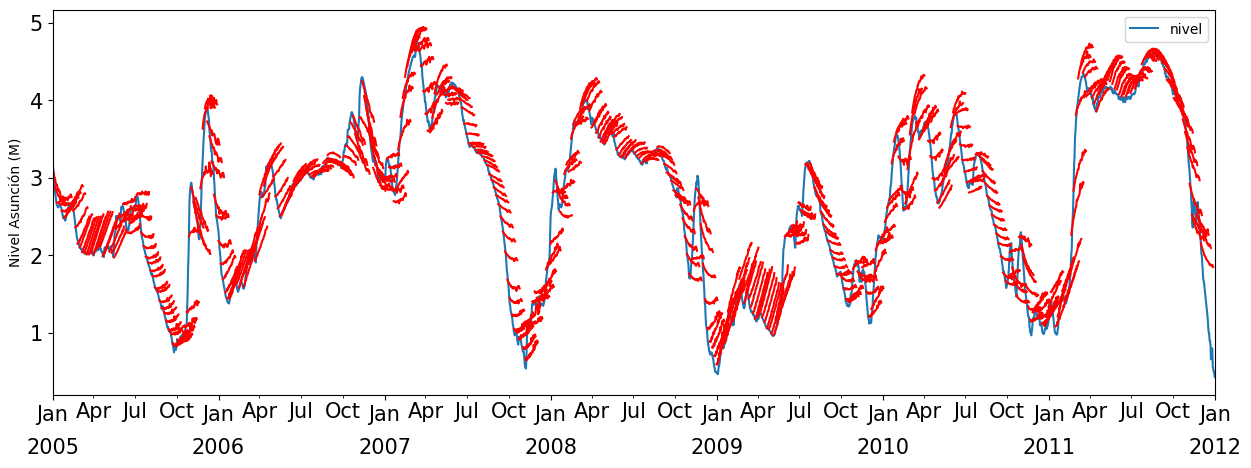

In [53]:

df = val[['nivel']][tamanio_ventana:]

# Se crea una figura f y el eje ax
f, ax = plt.subplots(figsize=(15, 5))

# Gráficos de líneas con datos de df y eje ax
sns.lineplot(data=df, ax=ax)

# Formato de fechas
# Objeto localizador coloca marcas menores cada 3 meses
fmt_month = mdates.MonthLocator(interval=3)
# Marcas cada año
fmt_year = mdates.YearLocator()

ax.xaxis.set_minor_locator(fmt_month)
# '%b' para obtener los nombres de los meses Muestra los meses como Ene, Feb ..
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Tamaño de fuente de las etiquetas de marcas
ax.tick_params(labelsize=15, which='both')

# Crear un segundo eje x debajo del primero para mostrar el año en formato YYYY
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ocultar las líneas y marcas del segundo eje x
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, labelsize=15)

ax.set_ylabel('Nivel Asunción (M)')
ax.set_xlabel('')
ax.set_xlim(df.index[0], df.index[-1])

j = 0
mse = []
maxe = []
t = []

# El bucle itera sobre los valores predichos (Y_prediction) con un paso de horizonte.
for i in range(0, len(Y_prediction), horizonte):
    if (j % 5 == 0) and ((j + horizonte) < len(df)):  # Si j es divisible por 5 calcula mse, maxErr de
        # Los valores reales de df.nivel[j:(j + horizonte)]) y valores predichos Y_prediction[i:i + horizonte]
        mse.append(mean_squared_error(np.array(df.nivel[j:(j + horizonte)]), Y_prediction[i:i + horizonte]))
        maxe.append(max_error(np.array(df.nivel[j:(j + horizonte)]), Y_prediction[i:i + horizonte]))
        t.append(df.index[j])
        
        plt.plot(df.index[j:(j + horizonte)], Y_prediction[i:i + horizonte], color='red')
    j += 1
plt.show()

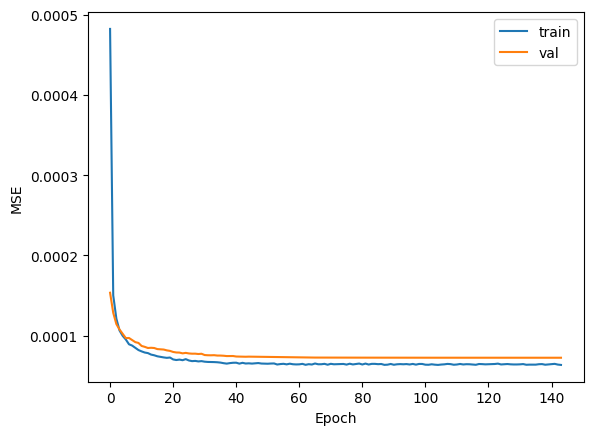

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper right')
plt.show()

In [56]:
desde = (dt.datetime.strptime('2013-01-01', '%Y-%m-%d')- dt.timedelta(days=tamanio_ventana)).strftime('%Y/%m/%d') # Toma la fecha que se encuentra en el año '2018-01-01' hasta 'tamanio_ventana' días antes
test = datos_normm.loc[desde:'2022-01-01'] # Toma el conjunto de datos para la test
ix = test.index # Toma los indices del conjunto de datos de test
testScaler = RobustScaler()# Inicializa una normalización de 0 a 1 para el conjunto de datos de test
testScaler.fit(test) # Ajusta la normalización a los datos de test
testScaled = pd.DataFrame(testScaler.transform(test),columns=test.columns) # Crea un dataframe con el conjunto de datos de test normalizados y ajustados
testScaled.set_index(ix) # Agrega como indice la fecha al dataframe con los conjuntos de datos normalizados y ajustados
x_test, y_test = preparar_datos(tamanio_ventana,horizonte, testScaled) # Divide los datos de test

In [57]:
Y_prediction = testScaler.inverse_transform(np.hstack(((model.predict(x_test).reshape(-1, 1), np.zeros((np.size(y_test),nfeatures -1))))))[:, 0] # Predicción del modelo sobre los datos de test, y luego aplica una transformación inversa para delver los datos a su escala original
y_test_inv = testScaler.inverse_transform(np.hstack(((y_test.reshape(-1, 1), np.zeros((np.size(y_test),nfeatures -1))))))[:, 0] # Transformación inversa de 'y_test' a su escala original
mse = mean_squared_error( y_test_inv, Y_prediction) # Calculo del error cuadrático medio
mse = mean_squared_error( y_test_inv, Y_prediction) # Calculo del error cuadrático medio
rmse = np.sqrt(mse) # Calculo de la raíz del error cuadrático medio
maxError_ = max_error(y_test_inv, Y_prediction) # Error máximo entre y_test_inv e y y_prediction
r2_ = r2_score(y_test_inv, Y_prediction) # Calculo del coeficiente de determinación r cuadrado, que indica la proporción de la varianza en las etiquetas de test. Un valor cercano 1 indica un buen ajuste dell modelo 
nse = 1 - (np.sum((y_test_inv - Y_prediction) ** 2) / np.sum((y_test_inv - np.mean(y_test_inv)) ** 2)) # Cálculo de la metrica nse 
print( "MSE: " + str(mse)+" RMSE:" + str(rmse  )) # Muestra el MSE y RMSE
print( "MaxError: " + str(maxError_)+" R2:" + str(r2_  )) # Muestra maxError_ y R^2
print("NSE: " + str(nse)) # Muesta el NSE
end_time = time.time() # Registra el tiempo final desde la epoca
elapsed_time = end_time - start_time # Tiempo transcurrido entre epocas
print(f"Time step : {elapsed_time:.6f} seconds") # Muestra el tiempo transcurrido

102/102 [==============================] - 1s 7ms/step
MSE: 0.3750102026947098 RMSE:0.61238076610448
MaxError: 3.937072009295225 R2:0.9080858973655315
NSE: 0.9080858973655315
Time step : 1088.164193 seconds


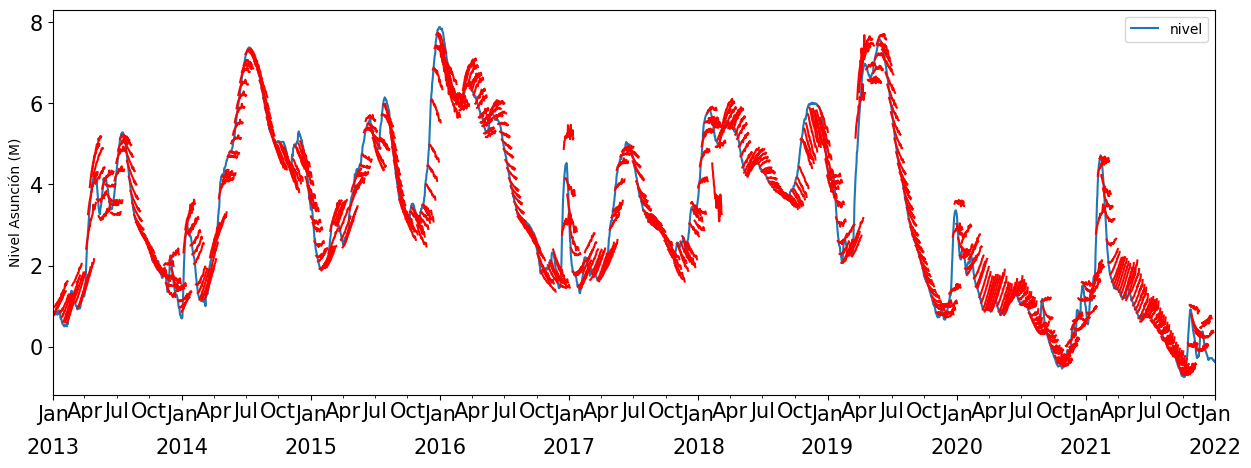

In [58]:
df = test[['nivel']][tamanio_ventana:]

# Se crea una figura f y el eje ax
f, ax = plt.subplots(figsize=(15, 5))

# Gráficos de líneas con datos de df y eje ax
sns.lineplot(data=df, ax=ax)

# Formato de fechas
# Objeto localizador coloca marcas menores cada 3 meses
fmt_month = mdates.MonthLocator(interval=3)
# Marcas cada año
fmt_year = mdates.YearLocator()

ax.xaxis.set_minor_locator(fmt_month)
# '%b' para obtener los nombres de los meses Muestra los meses como Ene, Feb ..
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Tamaño de fuente de las etiquetas de marcas
ax.tick_params(labelsize=15, which='both')

# Crear un segundo eje x debajo del primero para mostrar el año en formato YYYY
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ocultar las líneas y marcas del segundo eje x
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, labelsize=15)

ax.set_ylabel('Nivel Asunción (M)')
ax.set_xlabel('')
ax.set_xlim(df.index[0], df.index[-1])

j = 0
mse = []
maxe = []
t = []

# El bucle itera sobre los valores predichos (Y_prediction) con un paso de horizonte.
for i in range(0, len(Y_prediction), horizonte):
    if (j % 5 == 0) and ((j + horizonte) < len(df)):  # Si j es divisible por 5 calcula mse, maxErr de
        # Los valores reales de df.nivel[j:(j + horizonte)]) y valores predichos Y_prediction[i:i + horizonte]
        mse.append(mean_squared_error(np.array(df.nivel[j:(j + horizonte)]), Y_prediction[i:i + horizonte]))
        maxe.append(max_error(np.array(df.nivel[j:(j + horizonte)]), Y_prediction[i:i + horizonte]))
        t.append(df.index[j])
        
        plt.plot(df.index[j:(j + horizonte)], Y_prediction[i:i + horizonte], color='red')
    j += 1
plt.show()

In [65]:
print(modelo)

GRU_h28_w365_u30_d0.25_f1_y73


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper right')
plt.show()